<a href="https://colab.research.google.com/github/rkarpin/ML_LAB/blob/main/ML_homework_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [103]:
import spacy
import numpy as np
nlp = spacy.load("en_core_web_lg")

In [142]:



def similarity(vec: np.ndarray, topn: int = 5):

    expected_dim = nlp.vocab.vectors_length
    if vec.shape != (expected_dim,):
        raise ValueError(f"Input vector must be shape ({expected_dim},), got {vec.shape}")


    query = vec.reshape(1, -1)
    result = nlp.vocab.vectors.most_similar(query, n=topn)
    keys = result[0][0]

    words = [nlp.vocab.strings[k] for k in keys]


    def cosine(u, v):
        return float(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))


    for rank, w in enumerate(words, 1):
        w_vec = nlp.vocab[w].vector
        cos_score = cosine(vec, w_vec)
        print(f"{rank}. {w:<15s} (cosine = {cos_score:.4f})")



apple_vec = nlp.vocab["apple"].vector
similarity(apple_vec, topn=5)

1. APPLE           (cosine = 1.0000)
2. APPLES          (cosine = 0.7504)
3. BLACKBERRY      (cosine = 0.6921)
4. iPHone          (cosine = 0.6340)
5. FRUIT           (cosine = 0.6306)


In [105]:
from typing import List
def embed_word_lists(word_lists: List[List[str]]) -> List[List[np.ndarray]]:

    vector_dim = nlp.vocab.vectors_length
    zero_vec = np.zeros(vector_dim, dtype=np.float32)
    result: List[List[np.ndarray]] = []

    for inner in word_lists:
        embedded_inner: List[np.ndarray] = []
        for w in inner:
            lex = nlp.vocab[w]
            if lex.has_vector:
                embedded_inner.append(lex.vector.copy())
            else:

                embedded_inner.append(zero_vec.copy())
        result.append(embedded_inner)

    return result

In [106]:
def flatten_vectors(nested_vectors: List[List[np.ndarray]]) -> List[np.ndarray]:
    """
    Given a list of lists of NumPy vectors, return a single flattened list of vectors.
    """
    return [vec for sublist in nested_vectors for vec in sublist]

In [107]:
words = ["king","queen","man","woman","doctor", "nurse", "prince", "princess", "husband","wife",
         "bring", "brought", "get", "got", "like", "liked", "go", "went", "take", "took",
         "play","playing","have", "having","drink","drinking","sing","singing","smile","smiling",
         "wolf", "pack","cow","herd","bee","swarm", "sheep","flock","ant","colony",
         "house","igloo","mountain","iceberg", "water", "ice", "rain","snow","dessert","icecream",
         "good", "bad", "tasty","unappetizing","interesting","boring","beautiful","ugly","respectful","offensive",
         "small", "big", "slim","fat","short","tall","narrow","wide", "low","high",
         "cooking", "chef", "stealing","thief","painting","artist", "writing","writer", "arresting","policeman",
         "Poland","Warsaw","Germany","Berlin", "France","Paris","Italy","Rome","Japan","Tokyo",
         "tank","soldier","combine","farmer","plane","pilot","ambulance","paramedic", "car","driver"

         ]


In [144]:

def arithmetic(w1,w2,w3):
  out = nlp.vocab[w1].vector - nlp.vocab[w2].vector + nlp.vocab[w3].vector
  print(f"Closest words for {w1}+({w3}-{w2}):")
  similarity(out)

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

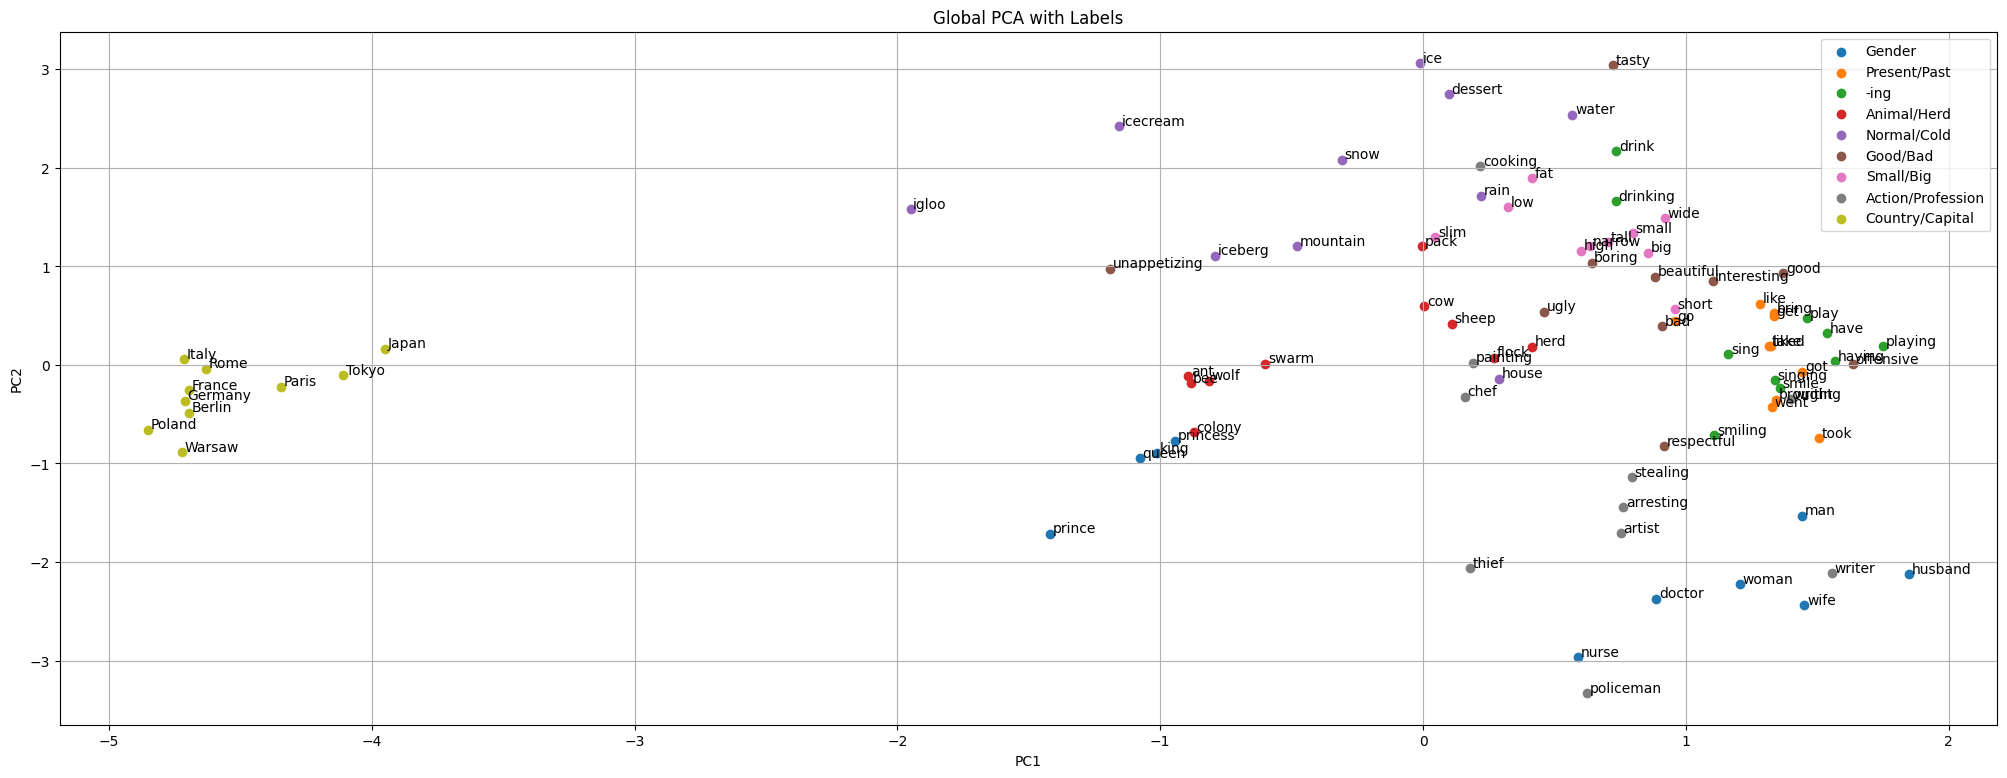

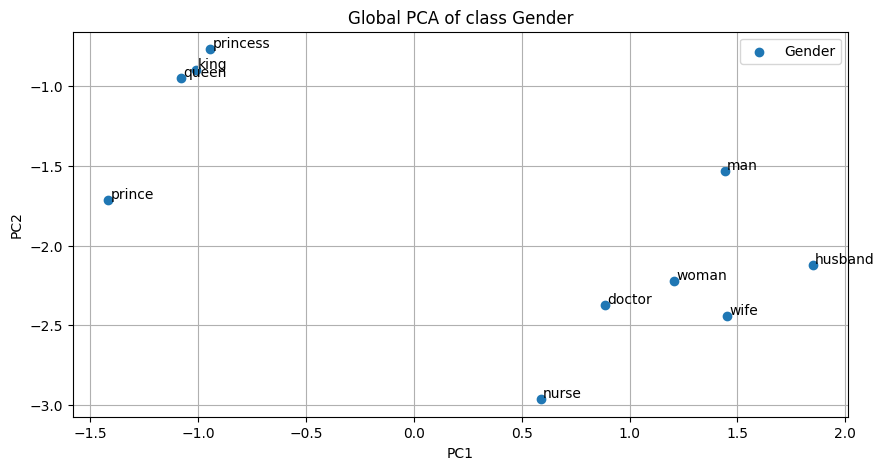

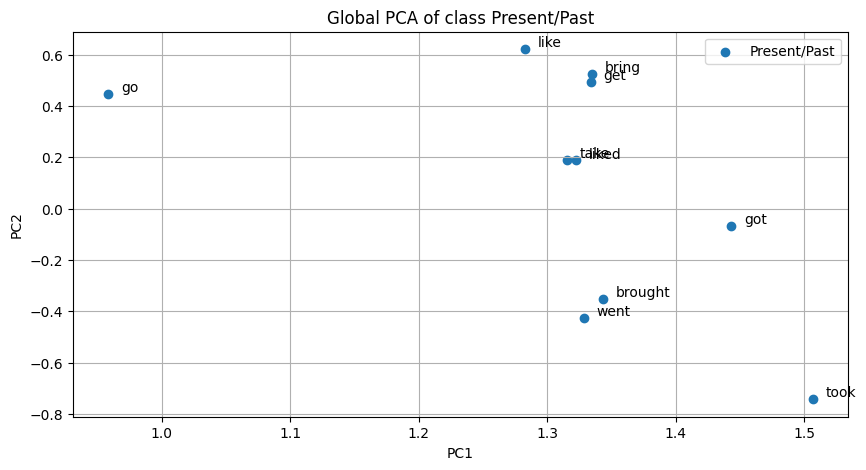

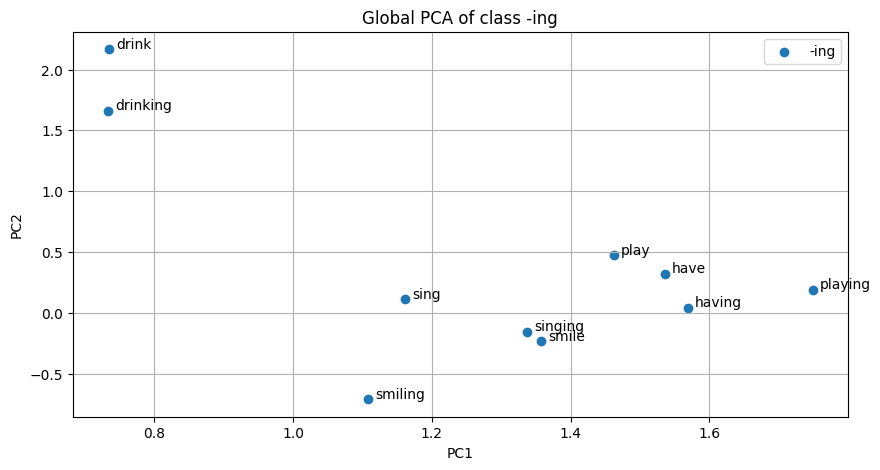

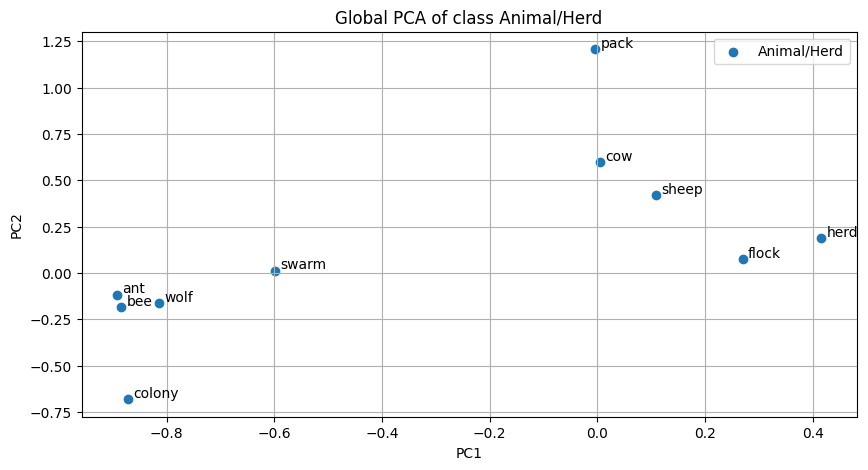

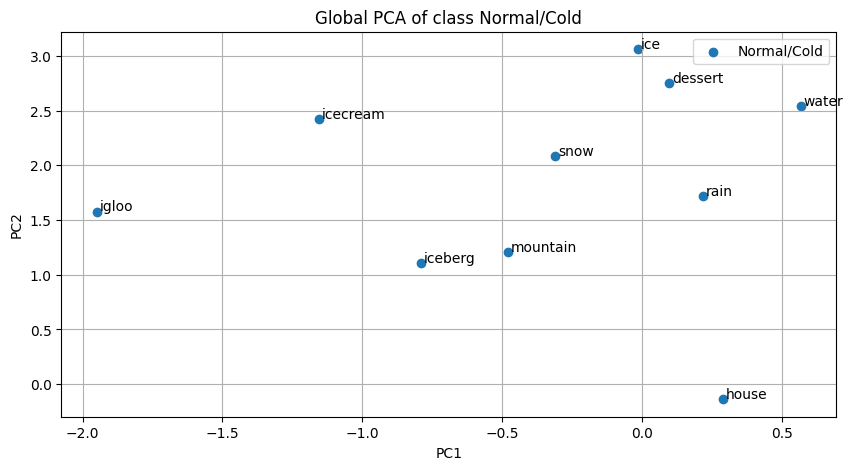

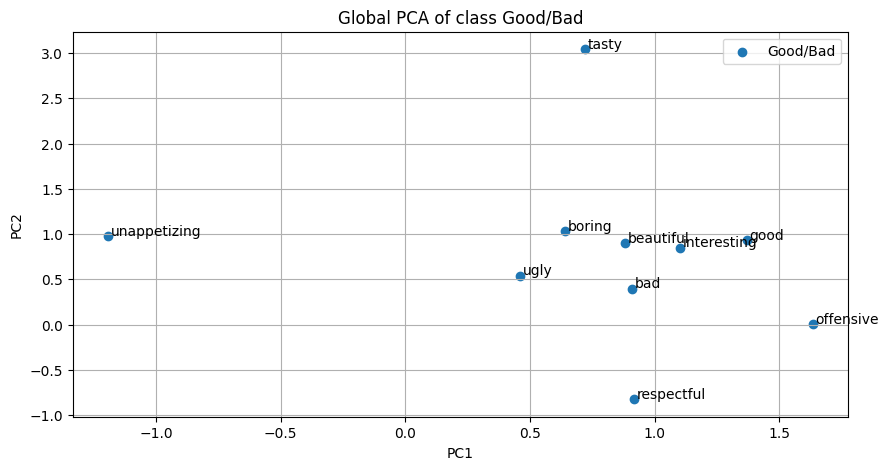

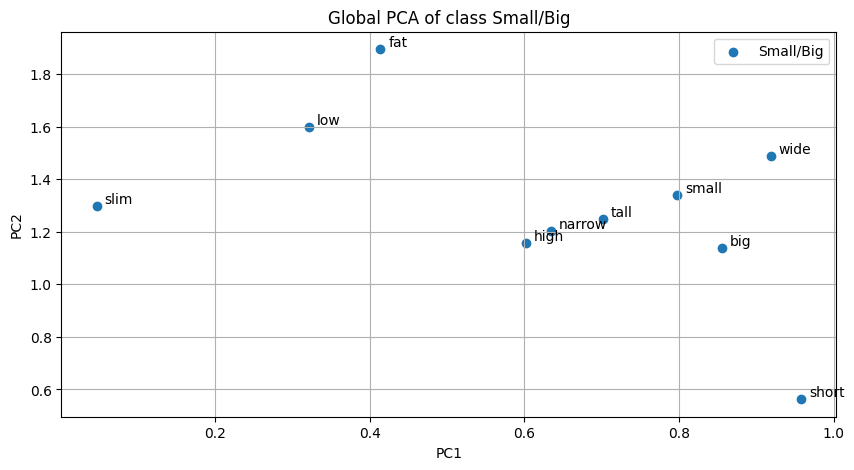

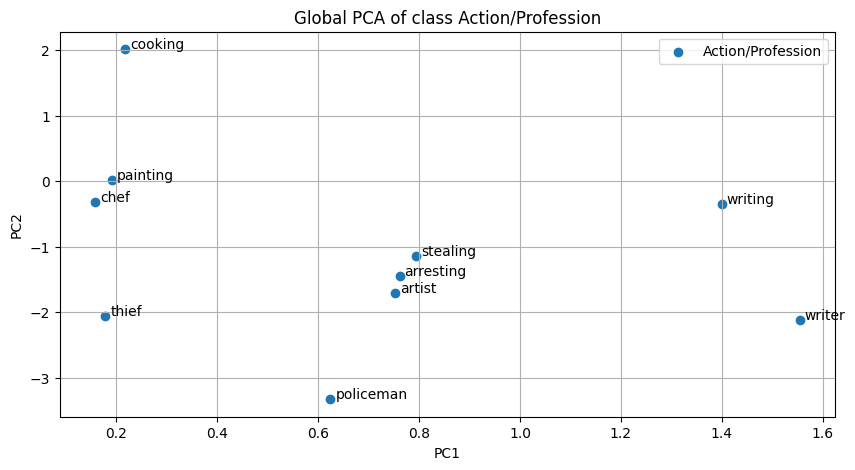

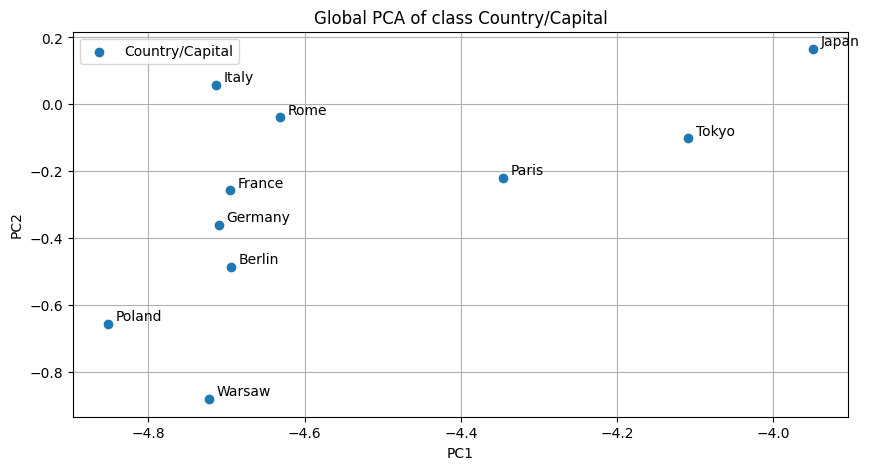

In [129]:
vectors = [nlp(w).vector for w in words]

X = np.vstack(vectors)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
labels = words
cluster_labels=["Gender","Present/Past","-ing","Animal/Herd","Normal/Cold","Good/Bad","Small/Big","Action/Profession","Country/Capital","Vehicle/Driver"]
x, y = X_pca.T

plt.figure(figsize=(25,9))
for cluster_idx in range(9):
    start = 10 * cluster_idx
    end = start + 10

    plt.scatter(x[start:end], y[start:end], label=cluster_labels[cluster_idx])


    for j in range(start, end):
        plt.text(
            x[j] + 0.01,
            y[j] + 0.01,
            labels[j],
            fontsize=10,
            color='black'
        )

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Global PCA with Labels")
plt.grid(True)
plt.show()

for cluster_idx in range(9):
    start = 10 * cluster_idx
    end = start + 10


    plt.figure(figsize=(10,5))
    plt.scatter(x[start:end], y[start:end], label=cluster_labels[cluster_idx])


    for j in range(start, end):
        plt.text(
            x[j] + 0.01,
            y[j] + 0.01,
            labels[j],
            fontsize=10,
            color='black'
        )

    plt.legend()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"Global PCA of class {cluster_labels[cluster_idx]}")
    plt.grid(True)
    plt.show()

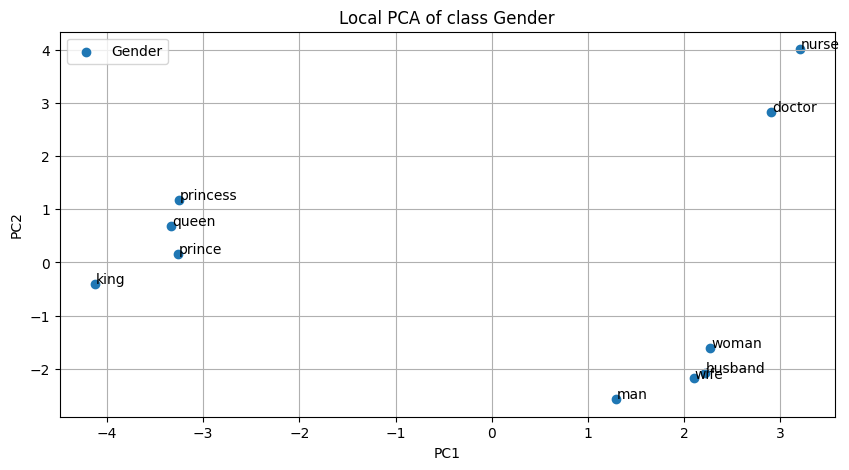

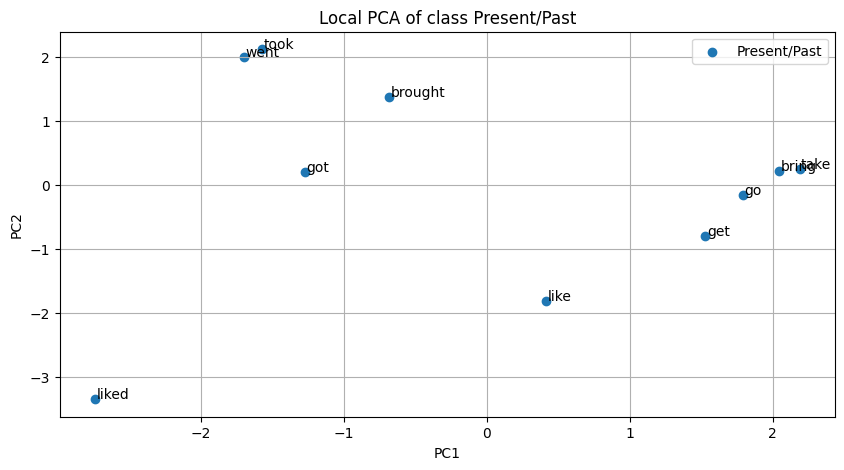

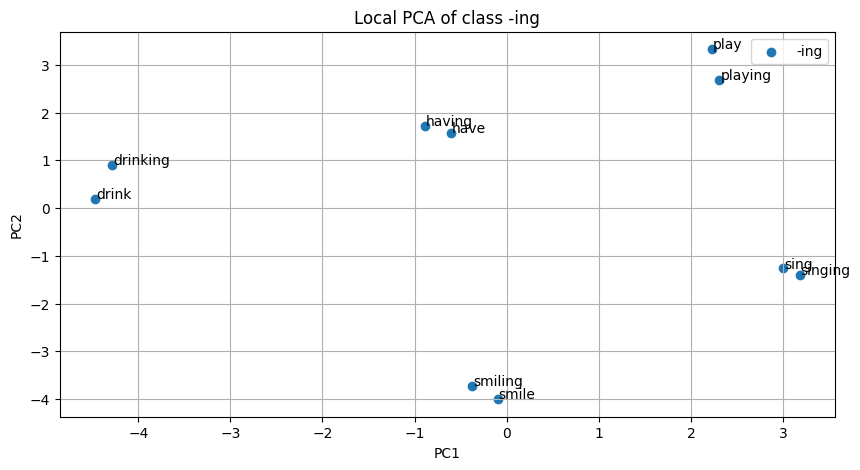

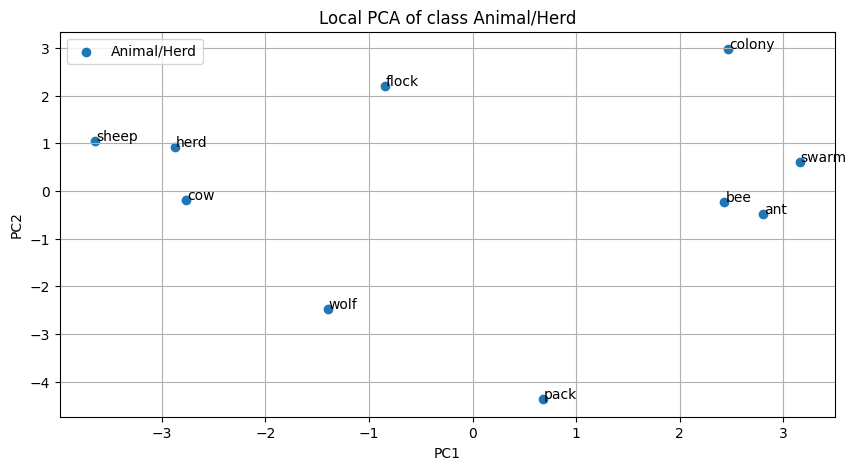

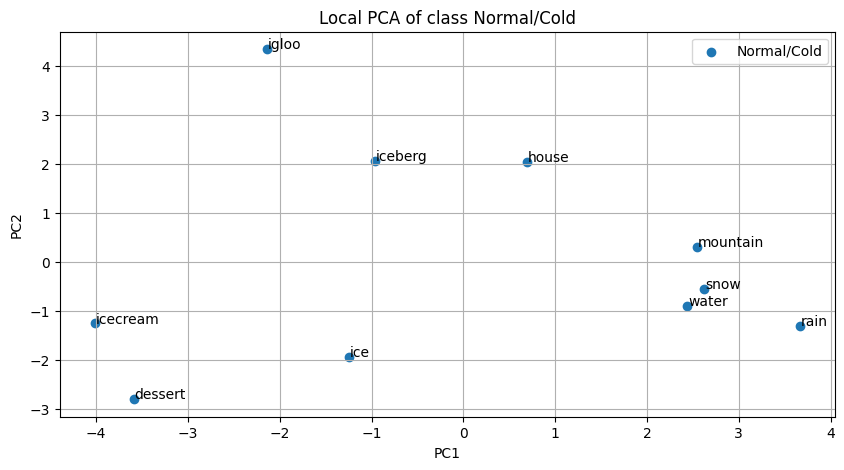

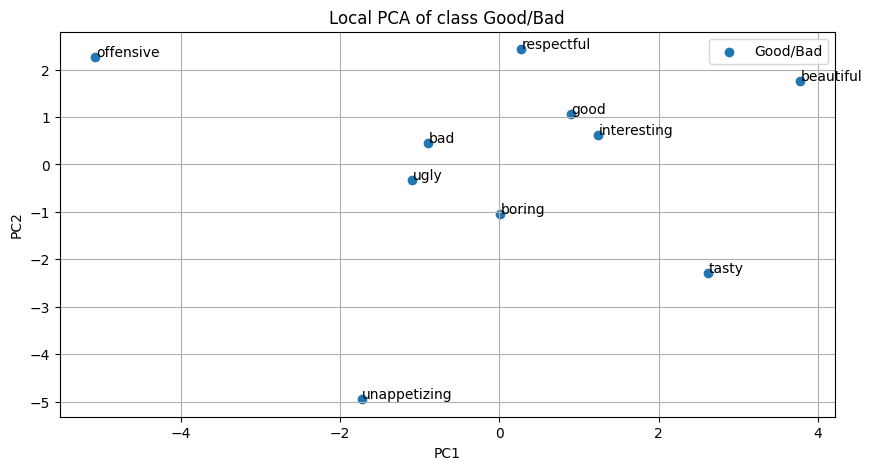

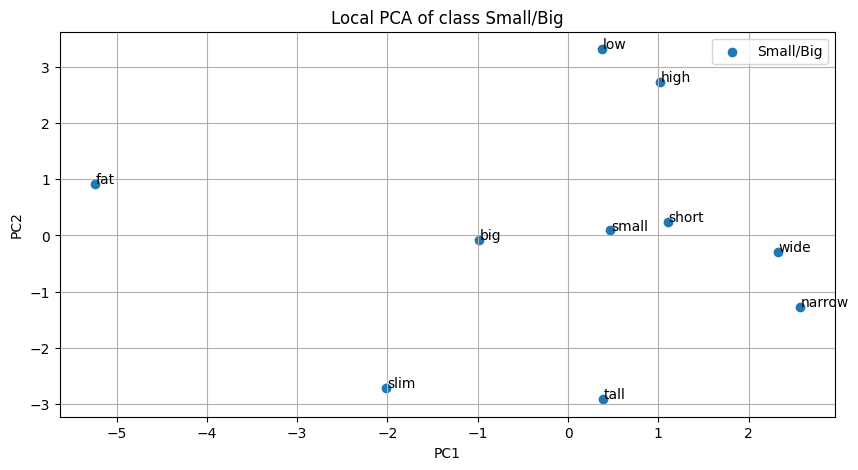

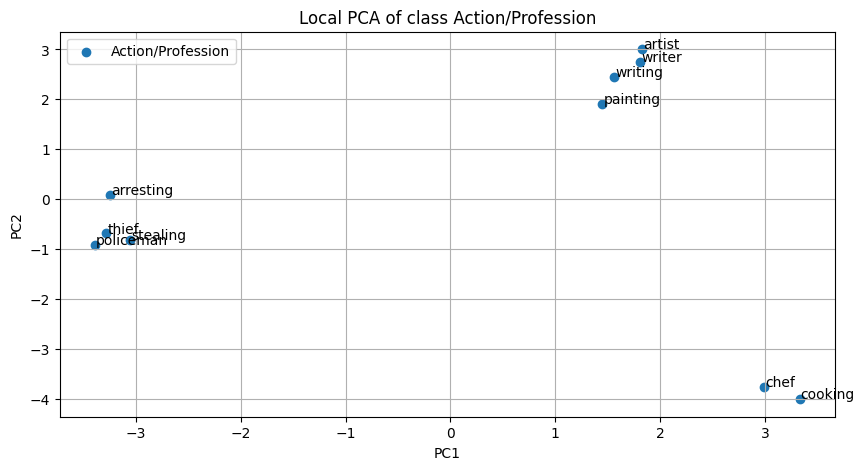

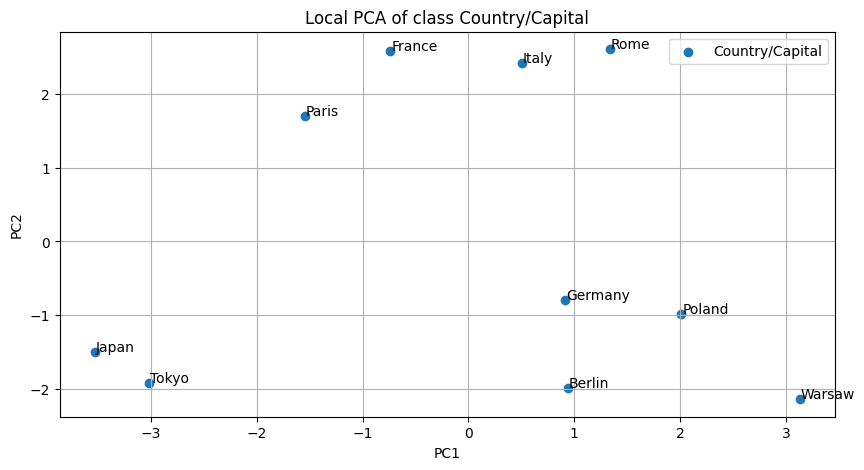

In [130]:
for cluster_idx in range(9):
    start = 10 * cluster_idx
    end = start + 10
    X = np.vstack(vectors[start:end])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    x, y = X_pca.T
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, label=cluster_labels[cluster_idx])


    for j in range(10):
        plt.text(
            x[j] + 0.01,
            y[j] + 0.01,
            labels[j+10*cluster_idx],
            fontsize=10,
            color='black'
        )

    plt.legend()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"Local PCA of class {cluster_labels[cluster_idx]}")
    plt.grid(True)
    plt.show()



In [145]:
for i in range(10):
  arithmetic(words[i*10],words[i*10+2],words[i*10+3])

Closest words for king+(woman-man):
1. KIng            (cosine = 0.8024)
2. QUEEN           (cosine = 0.7881)
3. PRINCE          (cosine = 0.6401)
4. KINGS           (cosine = 0.6209)
5. PRINCESS        (cosine = 0.6126)
Closest words for bring+(got-get):
1. BROUGHT         (cosine = 0.8248)
2. BRING           (cosine = 0.7774)
3. BRINGING        (cosine = 0.7263)
4. CAME            (cosine = 0.7248)
5. GAVE            (cosine = 0.7057)
Closest words for play+(having-have):
1. PLay            (cosine = 0.8509)
2. PLaying         (cosine = 0.8289)
3. PLAYS           (cosine = 0.7019)
4. PLayed          (cosine = 0.6905)
5. GAme            (cosine = 0.6453)
Closest words for wolf+(herd-cow):
1. WOLF            (cosine = 0.8058)
2. WOLVES          (cosine = 0.7733)
3. HERD            (cosine = 0.6784)
4. GRIZZLY         (cosine = 0.5770)
5. COYOTES         (cosine = 0.5516)
Closest words for house+(iceberg-mountain):
1. ICEBERG         (cosine = 0.5655)
2. HOUSE           (cosine = 0.4563

PCA wyraźnie oddzieliło klasę Państwa/Stolice od innych klas. Pozostałe klasy są zmieszane ze sobą, ale zazwyczaj wyrazy z tych samych klas są w miarę blisko siebie.

Lokalne PCA zazwyczaj dobrze rozdziela wyrazy w obrębie klasy według semantyki, widać to dobrze w klasie Płeć - została wizualnie rozdzielona na trzy grupy: {king, queen, prince, pirincess} - związane z władzą, {doctor, nurse} -zawody medyczne, {man, women, husband, wife}-pozostałe.

Podobnie w klasie Czynność/Zawód: mamy trzy grupy {artist, writer, painting, writing} -związane ze sztuką, {policeman, thief, arresting, stealing} - związane z policją, {chef, cooking} - związane z gotowaniem.

Dobry podział widać też w klasie -ing, gdzie w lokalnym PCA słowa z -ing są bardzo blisko słów bez -ing, na wykresie wyraźnie widać oddzielone pary.

Nie we wszystkich klasach widać to tak dobrze np. w klasie Duże/Małe nie ma tak jasnych grup.

Zależności wektorowe działąją tylko w niektórych klasach i raczej tylko w przybliżeniu. Np. w klasie Płeć, poprawna odpowiedź "queen" jest na drugim miejscu po "king.

Im bardziej abstrakcyjna jest zależność między słowami w klasie, tym zależności wektorowe są słabsze. Tzn. w klasach związanych z gramatyką, czyli Teraźniejszość/Przeszłość i -ing dodawanie wektorów zazwyczaj daje dobry wynik. Podobnie gdy elementy klasy możemy jednoznacznie dobrać w pary jak w przypadku Państwa/Stolice. Natomiast w przypadku zależności bardziej abstrakcyjnych jak Normalne/Zimne czy Pojazd/Kierowca efekt jest słaby.